### Desafio 2 - Exercício prático com SGDClassifier

Executar o exercício prático das Válvulas (anexo) utilizando o SGDClassifier do Sklearn para obtenção dos resultados de classificação. 

Link da documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [1]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import cross_val_score # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import SGDClassifier # biblioteca com funções para a execução da RNA SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('valvulas.csv')
df_test = pd.read_csv('valvulasTestes.csv')
df.describe()

,0.4329,-1.3719,0.7022,-0.8535,1.0000
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.452488,-0.095450,0.470215,1.769191,-0.058824
std,0.506779,1.174128,0.322801,1.811996,1.013281
min,-0.523100,-3.232900,-0.229100,-2.457200,-1.000000
25%,0.138175,-0.795075,0.270150,0.823200,-1.000000
50%,0.437800,0.042050,0.462100,1.562950,-1.000000
75%,0.732450,0.669150,0.725600,2.871025,1.000000
max,1.427600,2.147900,1.053000,5.823500,1.000000


In [3]:
df_test.describe()

,0.9694,0.6909,0.4334,3.4965,-1
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.502664,0.537764,0.659593,2.414721,0.000000
std,0.492475,1.452559,0.255406,1.754219,1.037749
min,-0.187400,-2.065600,0.203000,-0.658500,-1.000000
25%,0.234675,-0.497375,0.551175,0.879575,-1.000000
50%,0.497550,0.782200,0.625700,3.115300,0.000000
75%,0.591750,1.333650,0.880075,3.636350,1.000000
max,1.637500,3.536900,1.035900,5.353200,1.000000


In [7]:
x_train = df.iloc[:, range(0,4)].values
y_train = df.iloc[:, [4]].values

In [6]:
x_test = df_test.iloc[:, range(0,4)].values
y_test = df_test.iloc[:, [4]].values

### MinMaxScaler

In [8]:
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-v

Resultados da validação cruzada do conjunto completo de dados:
[1.         0.66666667 0.5        1.         0.5        1.
 1.         1.         1.         1.         1.         0.5
 1.         1.         1.         1.        ]
Média:  0.8854166666666666
Desvio Padrão:  0.20171788261496965

Processo de fit do modelo

Iterações:  33

MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 0.6428571428571429
Matriz de confusão das amostras não apresentadas no treinamento:
 [[7 0]
 [5 2]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

          -1       0.58      1.00      0.74         7
           1       1.00      0.29      0.44         7

    accuracy                           0.64        14
   macro avg       0.79      0.64      0.59        14
weighted avg       0.79      0.64      0.59        14



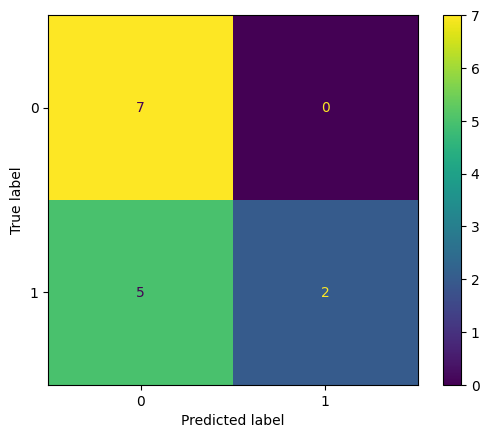

In [214]:
sgdc = SGDClassifier(max_iter=5000, tol=0.000001, alpha=0.00001, learning_rate='adaptive', penalty='elasticnet', eta0=0.0001, loss='perceptron')
scores = cross_val_score(sgdc, x_train, y_train, cv=16)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores)
print("Média: ", np.mean(scores))
print("Desvio Padrão: ", np.std(scores))

print("\nProcesso de fit do modelo\n")
sgdc.fit(x_train, y_train)
print("Iterações: ", sgdc.n_iter_)
y_pred = sgdc.predict(x_test)

print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")

print("")

relatorio = classification_report(y_test, y_pred)
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.show()